# Analysis on Hotel Dataset

## Loading Cleaned Data

In [227]:
if (!require(nnet)){
  install.packages("nnet")
}

Loading required package: nnet

Warning message:
"package 'nnet' was built under R version 3.6.3"


In [180]:
dat <- read.csv("Data/df.csv",header=TRUE)
star.dat <- dat[,c(2,11:dim(dat)[2])]

In [181]:
head(dat)

,X,stars_x,useful,text,name,address,postal_code,stars_y,attributes,categories,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3,0,"I stayed here twice in a short period of time in April 2014. The first time I liked it, the second time made me join the Hilton Hhonors program and recuse myself from Marriott for a while. I requested connecting rooms (traveling with my son and one of my parents each time). The first time we got that, the second time we did not. Disappointing, but it was more the way the woman checking us in clearly could not care less that my son couldn't stay near his Nana--good acting is the key to good customer service. The second time we stayed the heat was very loud, which I didn't figure out until my son was asleep so no way to get it fixed (assuming they'd care more about that issue). I don't much understand why housekeeping couldn't have filled out a note that the heat was broken--it was LOUD, they would have noticed. The bathroom was very small, very. But it was clean, the pool area was nice (although had not been cleaned during the night when we went down the next morning). Breakfast was fine, nothing special. I won't be staying here again.",Fairfield Inn & Suites by Marriott Madison East,2702 Crossroads Dr,53718,3.5,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True', 'BusinessAcceptsBitcoin': 'False', 'DogsAllowed': 'False'}","Hotels & Travel, Event Planning & Services, Hotels",...,0,0,0,0,0,0,0,0,0,0
2,1,4,1,"Our room on the second floor was very nice. The decor is Victorian, from the furniture to the color palette, even down to the little octagonal black and white tiles in the bathroom. There was a lovely fireplace, and the toilet tank was mounted by the ceiling with a pull chain to flush. There was a small sitting area and full sink, countertop and mini fridge, a full sized coffee maker and a small flat screen TV. The mattress was comfortable, the towels were soft and there was good water pressure in the shower. We stayed in the winter and the room was toasty warm. From our room you could hear the traffic noise, especially due to the wet roads, and the room is above a bar. From the bathroom we could hear distant voices, maybe from the bar or from an adjoining room, but it wasn't a problem. I could hear people walking in their room on third floor a couple of times. The thing that was a surprise as far as noise were the trains that went through in the wee hours of the morning. We had arrived after dark and didn't notice that a railway crossing was right outside our window one story down, and at least twice trains went by and blew their horns a few toots as they passed the intersection. We had some drinks, including complimentary ones for our stay, at the Up North, and the bartender told us we could take drinks and popcorn up to the room if we would like. The Hotel Ruby Marie was a charming stay and I would stay again if I were looking to spend some time in the area.",Hotel Ruby Marie,524 E Wilson St,53703,4.0,"{'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'free'""}","Bed & Breakfast, Hotels & Travel, Hotels, Event Planning & Services",...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,"This hotel has good intentions. The service was adequate. The room was clean. The vintage decor of this place does not resonate with me. I don't get it. ..it just looks outdated...but not in a fashionable way ...just in a we're going to grandma's house kinda way...In fact, after having stayed the weekend here, im sarting to wonder if all the 4 & 5 star reviews i read beforehand about the vintage charm of the hotel are even real. The breakfast at the Come Back In was the real deal. The buttermilk pancakes were a little bland, the pan fried potatoes were tasty but greasy but, even with that said, brea

In [182]:
dim(dat)

[1] 1532 1405

In [183]:
head(star.dat)

,stars_x,stayed,twice,short,period,time,first,liked,second,made,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,2,1,1,1,7,2,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
dim(star.dat)

[1] 1532 1396

## Manipulating Cleaned Data For the Analysis

Since we have a huge dimensionality, we need to reduce down it by unmeaningful words. We selected out the words more used than 3rd quantile.

In [185]:
words <- apply(star.dat[,2:dim(star.dat)[2]],2,sum)

wordembedding.dat <- star.dat
for (i in 1:dim(star.dat)[2]-1){
  wordembedding.dat[which(star.dat[,i+1] >=1),i+1]=1
}
stars <- star.dat[,1]
wordembedding.dat <- wordembedding.dat[names(sort(words[words>summary(words)[5]], decreasing= TRUE))]
wordembedding.dat <- cbind(stars,wordembedding.dat)
wordembedding.dat$stars <- as.factor(wordembedding.dat$stars)

In [186]:
head(wordembedding.dat)

,stars,room,hotel,stay,nice,breakfast,staff,clean,great,place,...,doesnt,almost,keep,may,loved,charge,spot,level,several,without
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,4,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [187]:
dim(wordembedding.dat)

[1] 1532  349

We reduce down the dimensionality from 1396 to 349. We loaded and sorted words based on how they are frquently used.

In [205]:
sort(words[words>summary(words)[5]], decreasing= TRUE)

room         hotel          stay          nice     breakfast 
         2549          2068           975           860           769 
        staff         clean         great         place           one 
          733           721           716           659           622 
          bed         night         would       madison          good 
          608           600           596           552           550 
          get          like          desk          free        stayed 
          546           524           513           509           477 
         time          area         front      location          also 
          471           450           447           442           422 
     friendly        really             u          pool         didnt 
          410           407           399           392           375 
      service          back           day       parking          well 
          369           350           324           323           317 
  comfortable           bar          even         could           lot 
          313           310           301           299           293 
     bathroom         floor            go          dont    restaurant 
          283           275           274           264           264 
          got           two            im        shower          work 
          262           245           243           238           236 
        water          need       staying         lobby        people 
          234           234           232           227           226 
        thing        little         first       morning         check 
          226           225           224           224           222 
          hot          star           inn          make         price 
          219           217           216           214           207 
        next.         super          much         right        around 
          206           203           201           201           201 
   experience       helpful    definitely          food         small 
          199           195           194           194           193 
   everything         never          went           new          told 
          193           191           190           188           186 
         door        coffee       shuttle          hour            X2 
          186           185           184           183           183 
       pretty         guest           use          best        better 
          180           174           173           172           172 
          big          said          many          made           ive 
          171           170           165           164           164 
     business      downtown           way        enough            tv 
          161           159           156           156           155 
         year         every           say         suite         sleep 
          155           155           154           153           153 
        close        minute       manager         going          come 
          153           152           152           150           150 
        drink       overall          look           bit         wasnt 
          149           148           147           144           143 
    recommend        street        always          find          sure 
          142           142           141           141           140 
          old       weekend          away          feel            X3 
          140           138           138           138           136 
        issue          ever         quiet          came         large 
          135           135           135           135           134 
          see        though          take          know        called 
          133           131           130           130           130 
         view       checked        booked          give         still 
          130           130           129           129           128 
          kid          easy      

We built up a function to draw barplots of frequency of some choosed words

In [209]:
word.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(wordembedding.dat$stars == 1))
total.star2 <-length(which(wordembedding.dat$stars == 2))
total.star3 <-length(which(wordembedding.dat$stars == 3))
total.star4 <-length(which(wordembedding.dat$stars == 4))
total.star5 <-length(which(wordembedding.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(wordembedding.dat$star,wordembedding.dat[,ind])
star1 <-length(which(wordembedding.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(wordembedding.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(wordembedding.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(wordembedding.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(wordembedding.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}

## Word Frequency Checking

Among the sorted words above, we are going to select out some words and break them in to 5 different parts, which are adjective words, the words associated with service, the words associated with facility, the words associated with location and the words associated with atmosphere of the hotel.

### Checking Whether the Analysis Works properly by some adjective words

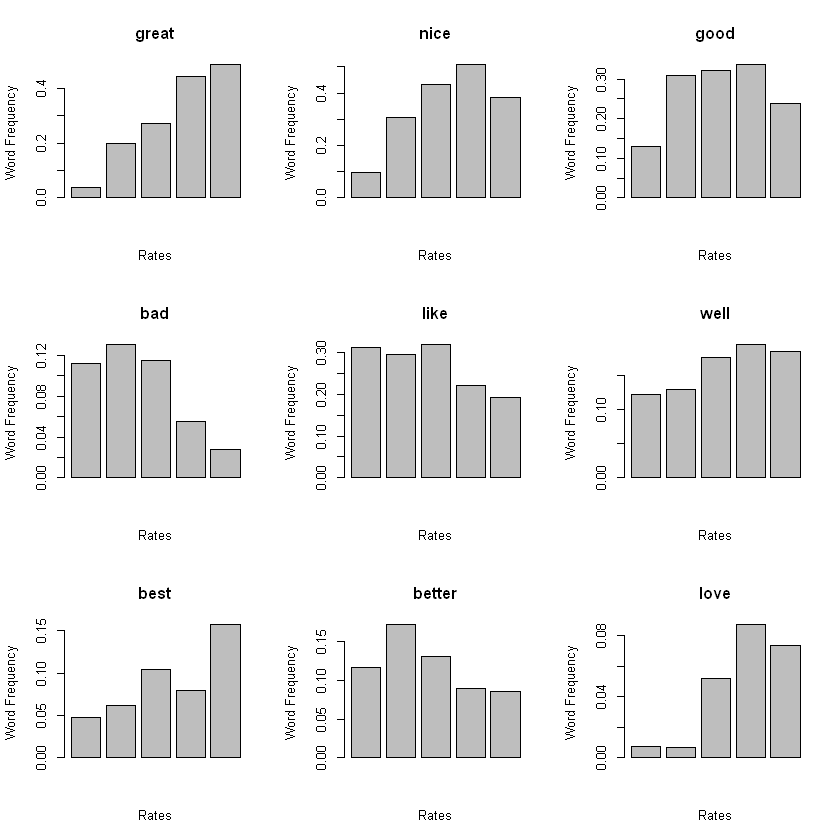

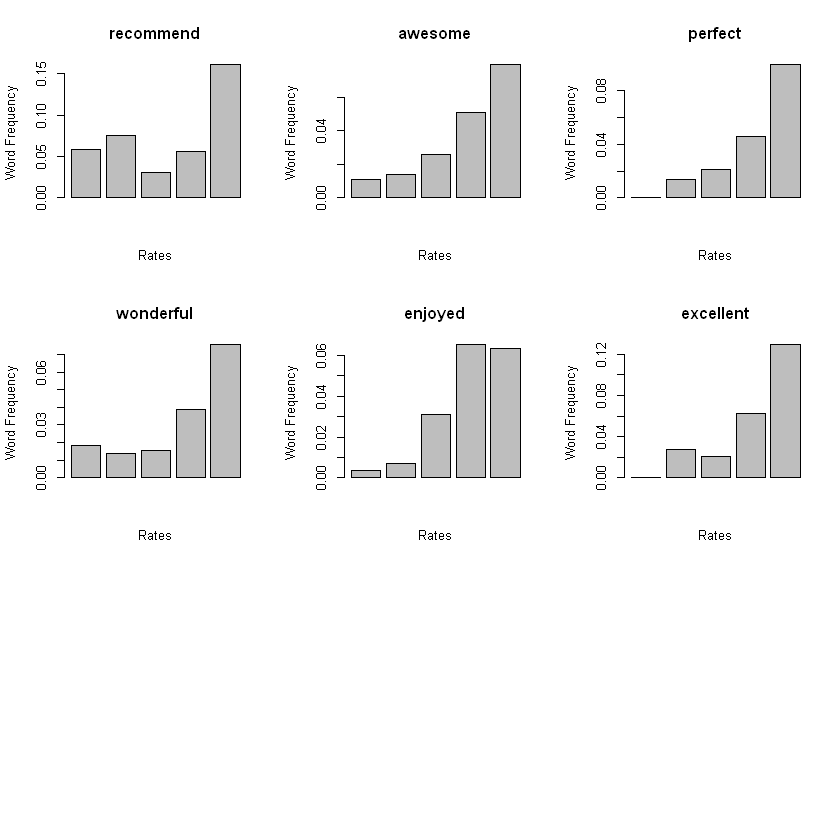

In [213]:
par(mfrow=c(3,3))
word.frequency("great")
word.frequency("nice")
word.frequency("good")
word.frequency("bad")
word.frequency("like")
word.frequency("well")
word.frequency("best")
word.frequency("better")
word.frequency("love")
word.frequency("recommend")
word.frequency("awesome")
word.frequency("perfect")
word.frequency("wonderful")
word.frequency("enjoyed")
word.frequency("excellent")

From the produced plots, we noticed the function worked properly.

### 1. Words associated with service

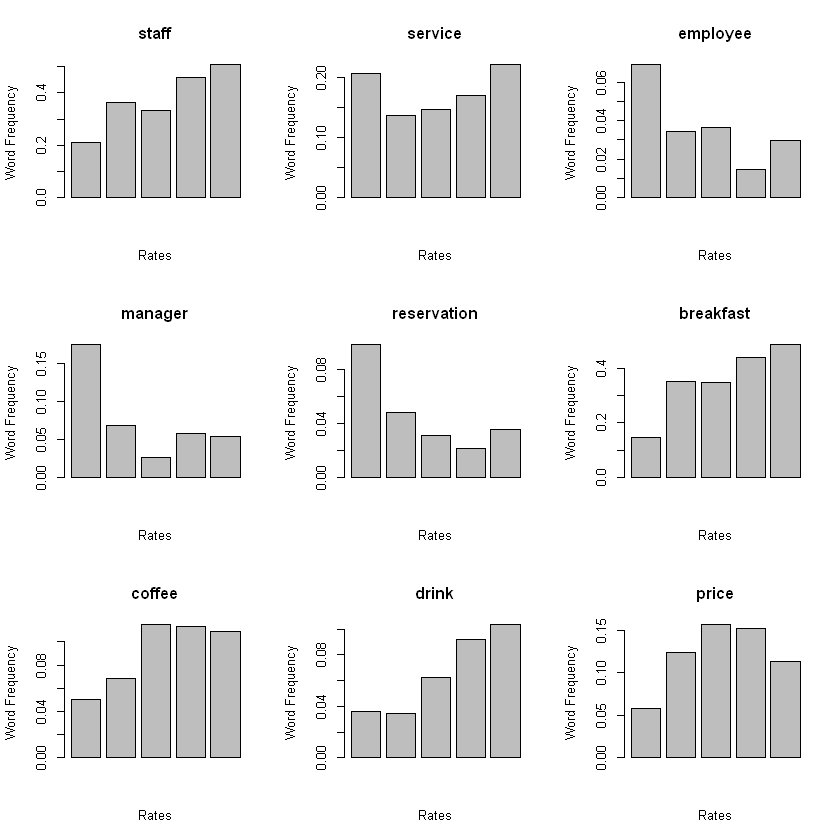

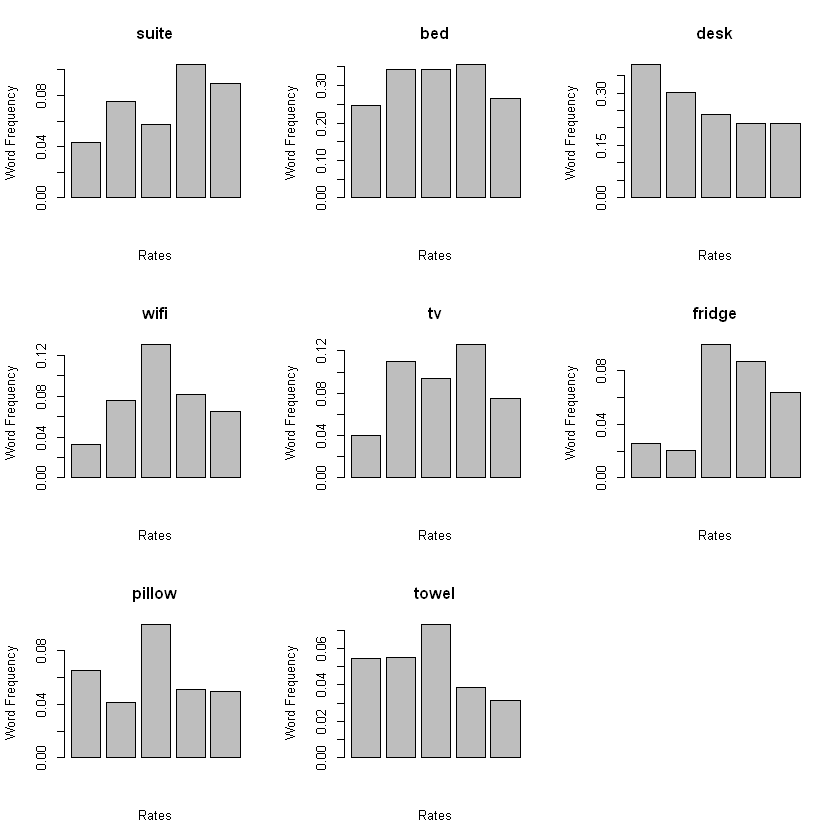

In [225]:
par(mfrow=c(3,3))
word.frequency("staff")
word.frequency("service")
word.frequency("employee")
word.frequency("manager")
word.frequency("reservation")
word.frequency("breakfast")
word.frequency("coffee")
word.frequency("drink")
word.frequency("price")
word.frequency("suite")
word.frequency("bed")
word.frequency("desk")
word.frequency("wifi")
word.frequency("tv")
word.frequency("fridge")
word.frequency("pillow")
word.frequency("towel")

Based upon the bar plots, the roles of empolyees are important for determining the evaluation. Also, other services like reservation, provided breakfast and drinks are played important role to determine the evaluation. The rate are not significantly differed by the provided furnitures except the desk.

### 2. Words associated with facility

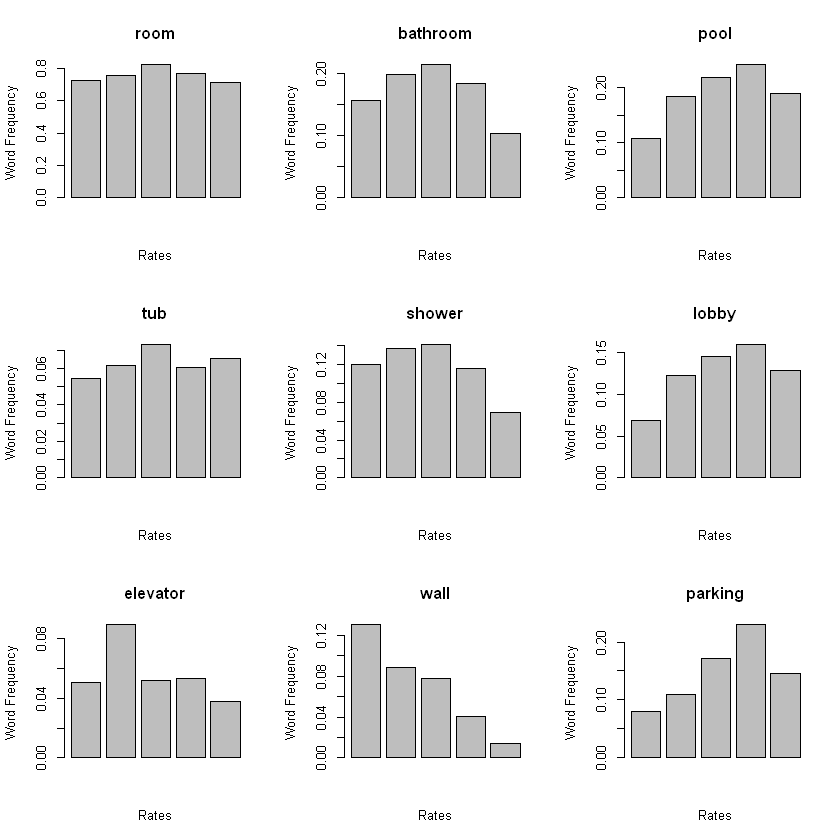

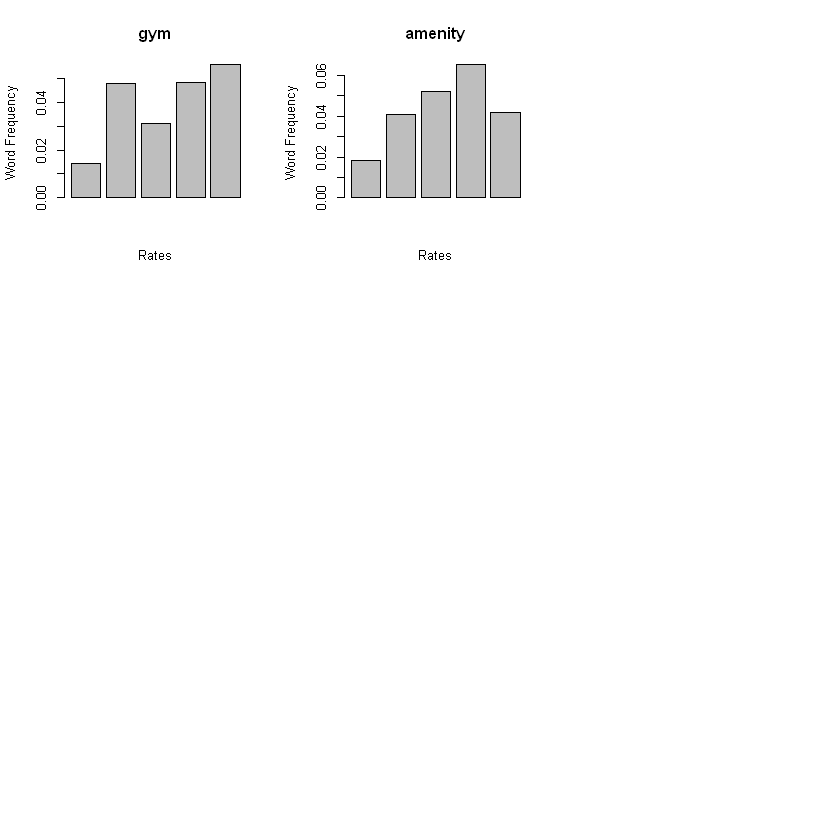

In [219]:
par(mfrow=c(3,3))
word.frequency("room")
word.frequency("bathroom")
word.frequency("pool")
word.frequency("tub")
word.frequency("shower")
word.frequency("lobby")
word.frequency("elevator")
word.frequency("wall")
word.frequency("parking")
word.frequency("gym")
word.frequency("amenity")

 From the second part of the visualization analysis, room itself does not play important role to the rating. However, amenities like gym, pool and parking places may affect to the rating. Interestingly, wall shows some significant difference.

### 3.Words associated with location

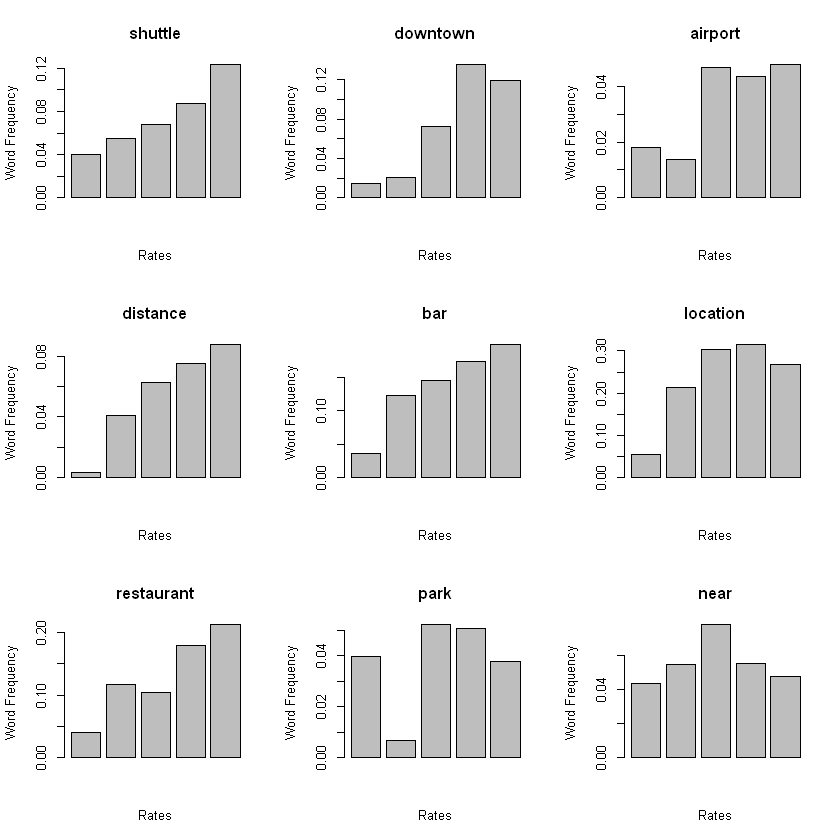

In [223]:
par(mfrow=c(3,3))
word.frequency("shuttle")
word.frequency("downtown")
word.frequency("airport")
word.frequency("distance")
word.frequency("bar")
word.frequency("location")
word.frequency("restaurant")
word.frequency("park")
word.frequency("near")

From the 3rd part of the graphical analysis, we noticed that the words related to the location of the hotels and neighborhood restaurants and bars shows some relationship to the rates. The words associated with transportations also are relatable with the rate.

### 4. Words associated with atmosphere of hotels

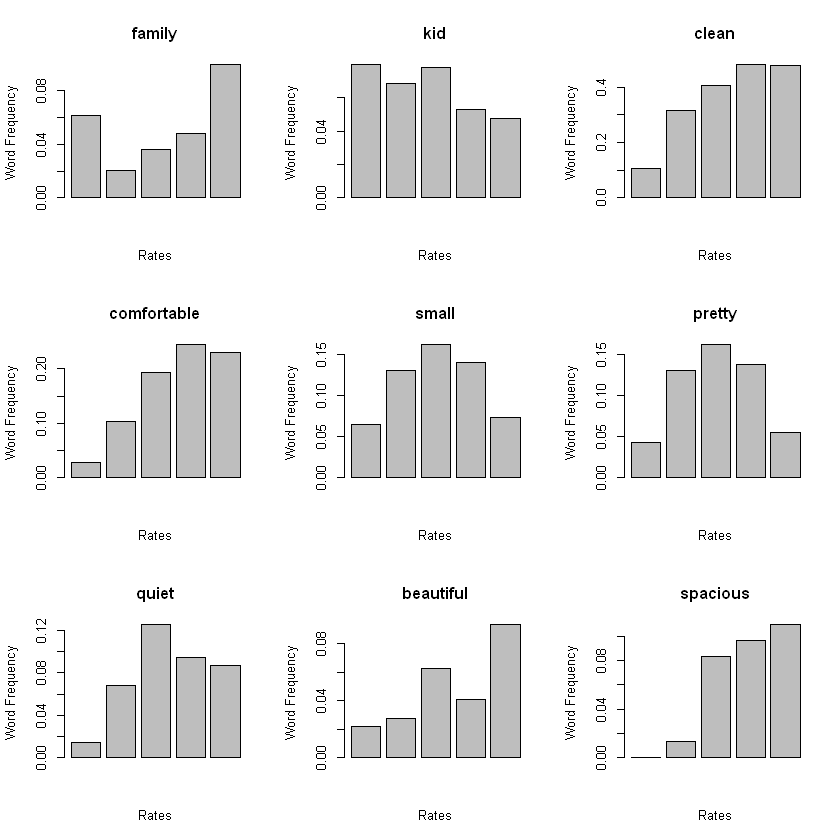

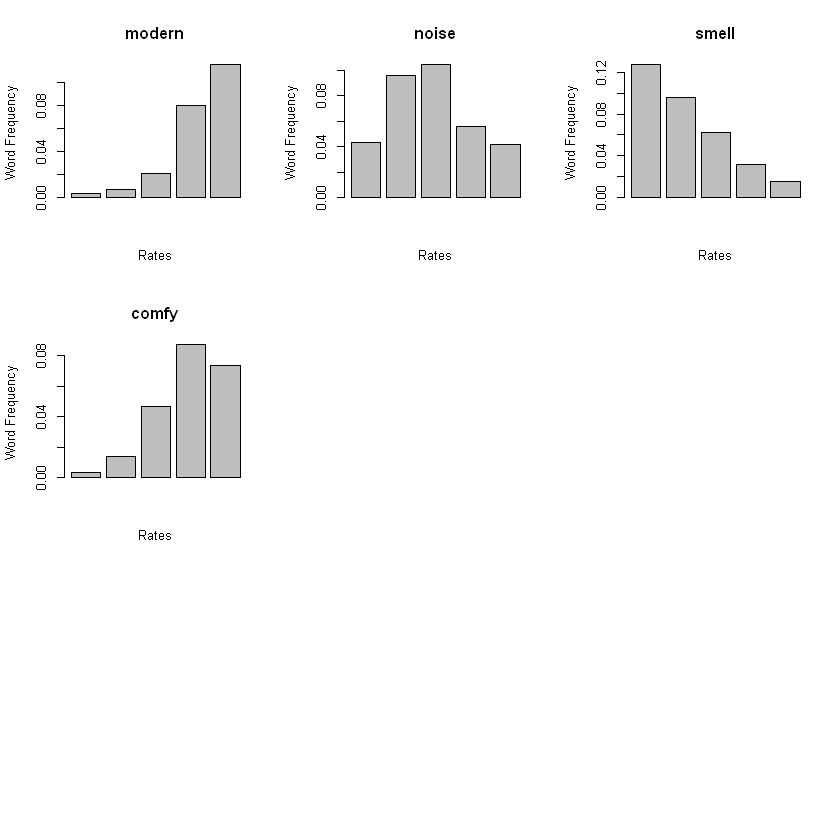

In [224]:
par(mfrow=c(3,3))
word.frequency("family")
word.frequency("kid")
word.frequency("clean")
word.frequency("comfortable")
word.frequency("small")
word.frequency("pretty")
word.frequency("quiet")
word.frequency("beautiful")
word.frequency("spacious")
word.frequency("modern")
word.frequency("noise")
word.frequency("smell")
word.frequency("comfy")

From the 4th part of the visualization analysis, it may seemed customers want more family friendly and modern environment. We observed cleaness, comfortableness, roominess and smell of the place is also played important roles in customers' evaluation.

## Anova Test For the Choosen Words

In [ ]:
wordembedding.dat[staff+service+employee+manager+reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel]

In [229]:
m1 <- multinom(stars~staff+service+employee+manager+reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m2 <- multinom(stars~service+employee+manager+reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m3 <- multinom(stars~employee+manager+reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m4 <- multinom(stars~manager+reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m5 <- multinom(stars~reservation+breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m6 <- multinom(stars~breakfast+coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m7 <- multinom(stars~coffee+drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m8 <- multinom(stars~drink+price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m9 <- multinom(stars~price+suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m10 <- multinom(stars~suite+bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m11 <- multinom(stars~bed+desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m12 <- multinom(stars~desk+wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m13 <- multinom(stars~wifi+tv+fridge+pillow+towel,data=wordembedding.dat)
m14 <- multinom(stars~tv+fridge+pillow+towel,data=wordembedding.dat)
m15 <- multinom(stars~fridge+pillow+towel,data=wordembedding.dat)
m16 <- multinom(stars~pillow+towel,data=wordembedding.dat)
m17 <- multinom(stars~towel,data=wordembedding.dat)
AIC.vec <- c(m1$AIC,m2$AIC,m3$AIC,m4$AIC,m5$AIC,m6$AIC,m7$AIC,m8$AIC,m9$AIC,m10$AIC,m11$AIC,m12$AIC,m13$AIC,m14$AIC,m15$AIC,m16$AIC,m17$AIC)
model <-c("m1","m2","m3","m4","m5","m6","m7","m8","m9","m10","m11","m12","m13","m14","m15","m16","m17")
cbind(model,AIC.vec)

# weights:  95 (72 variable)
initial  value 2465.658882 
iter  10 value 2168.638404
iter  20 value 2126.027688
iter  30 value 2124.883002
iter  40 value 2124.849873
iter  50 value 2124.847533
final  value 2124.847504 
converged
# weights:  90 (68 variable)
initial  value 2465.658882 
iter  10 value 2188.614143
iter  20 value 2161.381873
iter  30 value 2160.535498
iter  40 value 2160.502788
iter  50 value 2160.499098
final  value 2160.499002 
converged
# weights:  85 (64 variable)
initial  value 2465.658882 
iter  10 value 2195.610795
iter  20 value 2167.057376
iter  30 value 2166.151033
iter  40 value 2166.084311
iter  50 value 2166.071028
iter  50 value 2166.071011
iter  50 value 2166.071010
final  value 2166.071010 
converged
# weights:  80 (60 variable)
initial  value 2465.658882 
iter  10 value 2199.452478
iter  20 value 2171.107406
iter  30 value 2170.263718
iter  40 value 2170.190416
iter  50 value 2170.177029
final  value 2170.176957 
converged
# weights:  75 (56 variable)
initi

model,AIC.vec
m1,4393.69500841511
m2,4456.99800409054
m3,4460.14202004215
m4,4460.3539149682
m5,4487.22517531846
m6,4499.32322129384
m7,4570.75756582739
m8,4570.74905748157
m9,4580.9654521694
m10,4586.74594564902


## About AC Hotel by Marriott in Downtown Madison

In [150]:
avg.hotel <- sort(tapply(dat$stars_x,dat$name,mean))
avg.hotel["AC Hotel by Marriott Madison Downtown"]

AC Hotel by Marriott Madison Downtown 
                             3.454545

The average rate AC hotel obtained from customer is 3.46 which is close to 3.5. 

[1] 44

room         hotel          view          nice         floor 
           82            53            43            30            28 
        great           bar       capitol          stay       madison 
           24            21            19            18            17 
        staff        modern    restaurant           one      location 
           16            15            15            15            14 
        place     beautiful        really      friendly         drink 
           14            13            13            13            12 
        check       parking          also          good         night 
           12            12            12            12            12 
     building       amazing         super            go   comfortable 
           11            10            10            10            10 
            u         clean           new    experience        little 
           10            10             9             9             9 
       people          back          like           bed       capital 
            9             9             9             9             8 
          gym         right         could          desk         would 
            8             8             8             8             8 
    breakfast          walk          give        minute          make 
            8             7             7             7             7 
         star          work           got       service         front 
            7             7             7             7             7 
         area        stayed          late       outside         noise 
            7             7             6             6             6 
    excellent         think      downtown          many         never 
            6             6             6             6             6 
       shower            im      bathroom          even          time 
            6             6             6             6             6 
       window        wanted       problem          wall         smell 
            5             5             5             5             5 
      overall         close           say         every           way 
            5             5             5             5             5 
     business          made          said          told        around 
            5             5             5             5             5 
          two         didnt           get        couple          help 
            5             5             5             4             4 
           ac          paid         light       amenity          loud 
            4             4             4             4             4 
         card           top           ask        across        second 
            4             4             4             4             4 
        comfy      elevator       however           far          open 
            4             4             4             4             4 
         easy         quiet       weekend          come         sleep 
            4             4             4             4             4 
       enough          best    definitely         price         first 
            4             4             4             4             4 
        thing         lobby         water       without        charge 
            4             4             4             3             3 
          may       checkin       evening          game         offer 
            3             3             3             3             3 
        later    convenient       enjoyed          hear           etc 
            3             3             3             3             3 
      awesome     extremely       perfect         extra            X4 
            3             3             3             3             3 
       plenty       wedding            id          love   reservation 
            3             3             3             3             3 
      looking          town      

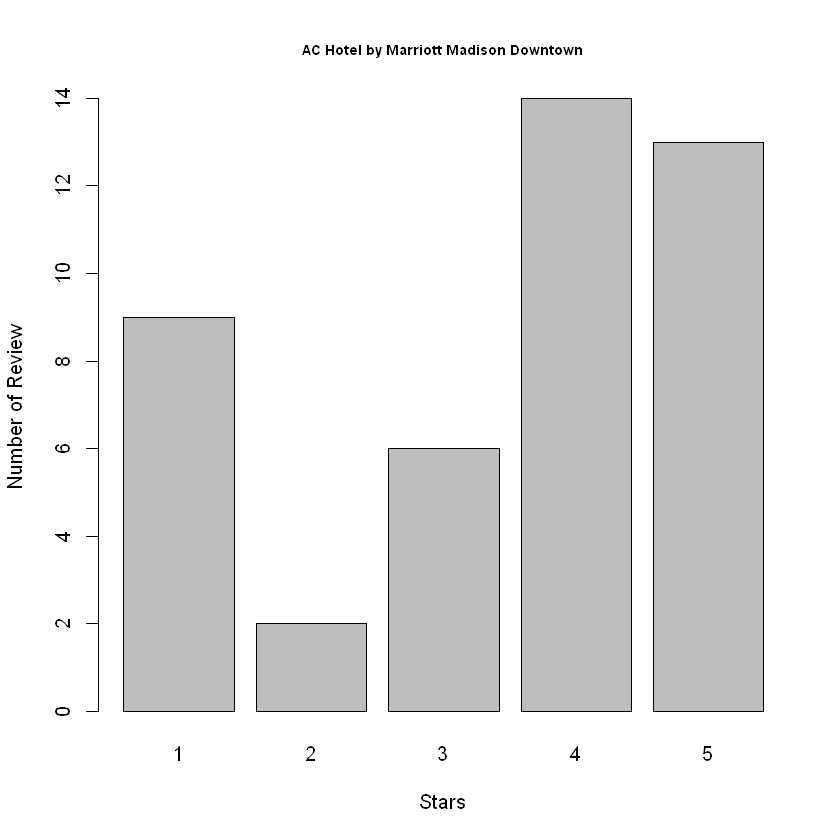

In [206]:
review.len <- c()
for(i in 1:length(names(avg.hotel))){
review.len[i] <- length(dat$stars_x[which(dat$name==names(avg.hotel)[i])])
}

length(dat$stars_x[which(dat$name=="AC Hotel by Marriott Madison Downtown")])
barplot(table(dat$stars_x[which(dat$name==names(avg.hotel)[22])]),xlab="Stars",ylab="Number of Review", main=names(avg.hotel)[22], cex.main = 0.7)

ac.dat <- dat[which(dat$name=="AC Hotel by Marriott Madison Downtown"),-c(1,3:10)]
stars <- ac.dat[,1]
ac.dat <- cbind(stars, ac.dat[names(sort(words[words>summary(words)[5]]))])

ac.words <- apply(ac.dat[,2:dim(ac.dat)[2]],2,sum)
sort(ac.words, decreasing= TRUE)

In [152]:
head(ac.dat)

,stars,spot,level,several,without,loved,charge,reason,employee,doesnt,...,one,place,great,clean,staff,breakfast,nice,stay,hotel,room
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1196,2,0,0,0,0,0,1,0,0,1,...,1,1,0,0,2,1,1,0,1,3
1197,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1198,4,0,0,0,0,0,1,0,0,0,...,1,1,2,0,0,0,1,1,3,4
1199,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,6
1200,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,3,0,1,3,0
1201,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [153]:
dim(ac.dat)

[1]  44 349

In [199]:
word.ac.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(ac.dat$stars == 1))
total.star2 <-length(which(ac.dat$stars == 2))
total.star3 <-length(which(ac.dat$stars == 3))
total.star4 <-length(which(ac.dat$stars == 4))
total.star5 <-length(which(ac.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(ac.dat$stars,ac.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}

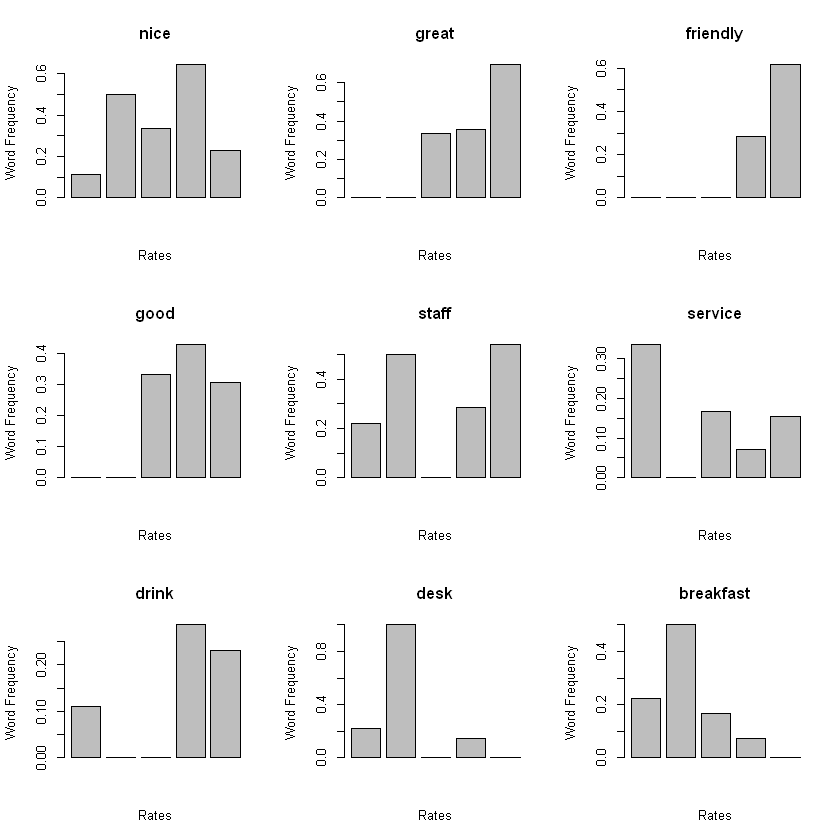

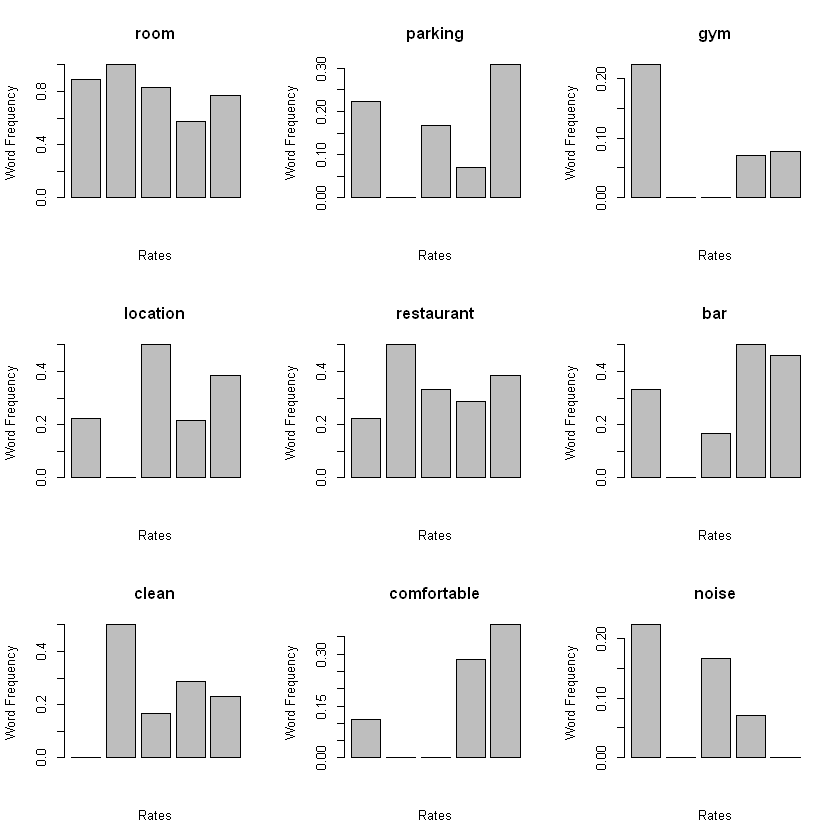

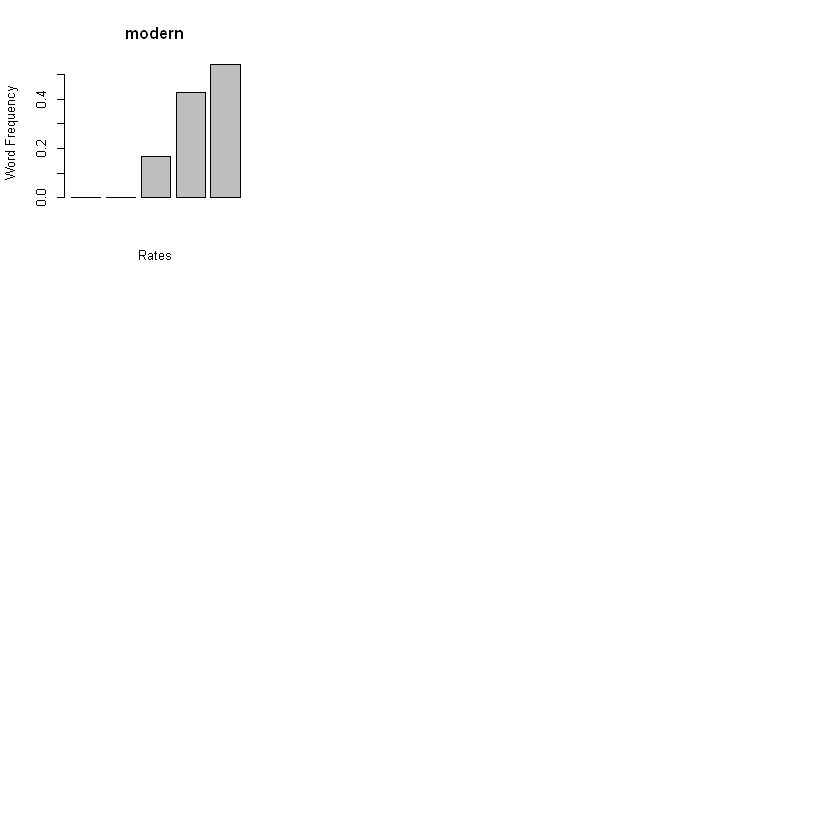

In [204]:
par(mfrow=c(3,3))
word.ac.frequency("nice")
word.ac.frequency("great")
word.ac.frequency("friendly")
word.ac.frequency("good")

word.ac.frequency("staff")
word.ac.frequency("service")
word.ac.frequency("drink")
word.ac.frequency("desk")
word.ac.frequency("breakfast")

word.ac.frequency("room")
word.ac.frequency("parking")
word.ac.frequency("gym")

word.ac.frequency("location")
word.ac.frequency("restaurant")
word.ac.frequency("bar")

word.ac.frequency("clean")
word.ac.frequency("comfortable")
word.ac.frequency("noise")
word.ac.frequency("modern")

## About the Hotels Who Received Better Rate

[1] 23

[1] "La Quinta by Wyndham Madison American Center"   
 [2] "Clarion Suites at the Alliant Energy Center"    
 [3] "AmericInn by Wyndham Madison West"              
 [4] "Comfort Inn Madison - Downtown"                 
 [5] "Holiday Inn Madison at The American Center"     
 [6] "Fairfield Inn & Suites by Marriott Madison East"
 [7] "Hyatt Place Madison Downtown"                   
 [8] "Cambria Hotel Madison East"                     
 [9] "Staybridge Suites Madison-East"                 
[10] "Homewood Suites by Hilton Madison West"         
[11] "The Madison Concourse Hotel and Governor's Club"
[12] "Hampton Inn Madison East Towne Mall Area"       
[13] "Sleep Inn & Suites"                             
[14] "DoubleTree by Hilton Hotel Madison"             
[15] "Super 8 by Wyndham Madison South"               
[16] "Holiday Inn Express & Suites Madison"           
[17] "Hotel Ruby Marie"                               
[18] "Tru by Hilton Madison West"                     
[19] "Hampton Inn & Suites Madison-West"              
[20] "Hampton Inn & Suites Madison / Downtown"        
[21] "Holiday Inn Express & Suites Madison Central"   
[22] "SpringHill Suites Madison"                      
[23] "Hotel Indigo Madison Downtown"

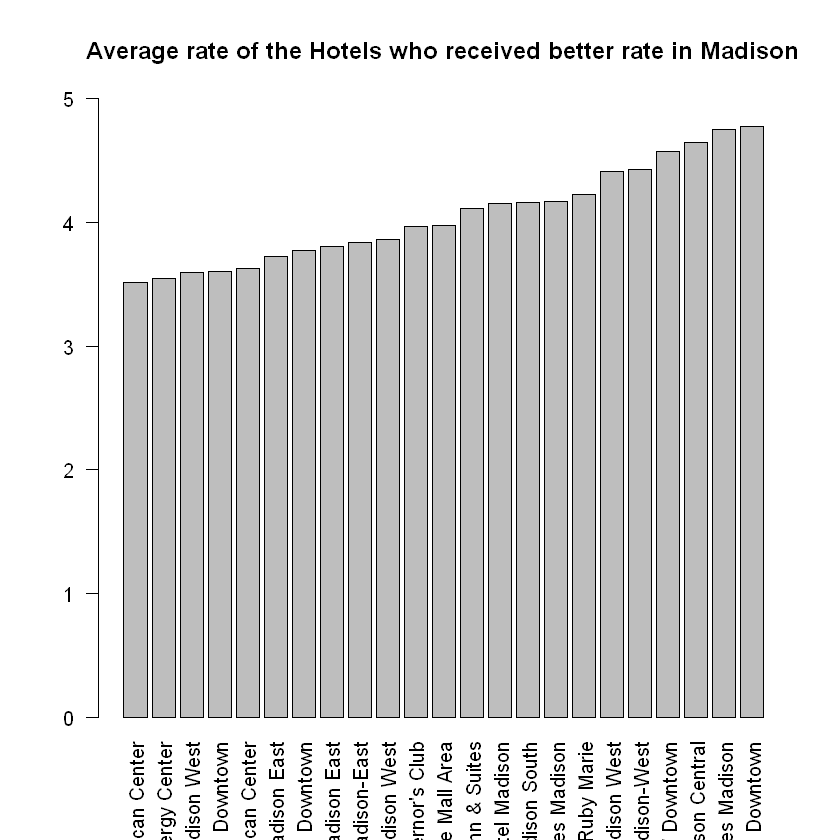

In [168]:
length(avg.hotel[avg.hotel > avg.hotel["AC Hotel by Marriott Madison Downtown"]])
par(cex.axis=1)
barplot(avg.hotel[avg.hotel > avg.hotel["AC Hotel by Marriott Madison Downtown"]], main = "Average rate of the Hotels who received better rate in Madison", ylim = c(0,5),las=2)
highrate.Hotels <- names(avg.hotel[avg.hotel > avg.hotel["AC Hotel by Marriott Madison Downtown"]])
highrate.Hotels

There are 23 hotels who obtained higher average evaluation from the customers in Madison Area.

In [163]:
rev <- c()
for(i in 1:23){
    rev[i] <- length(dat$stars_x[which(dat$name==highrate.Hotels[i])])
}
sum(rev)

ref <- c()
for (i in 1:23){
   temp <- which(dat$name==hightrate.Hotels[i])
   ref <- c(ref,temp) 
}

[1] 965

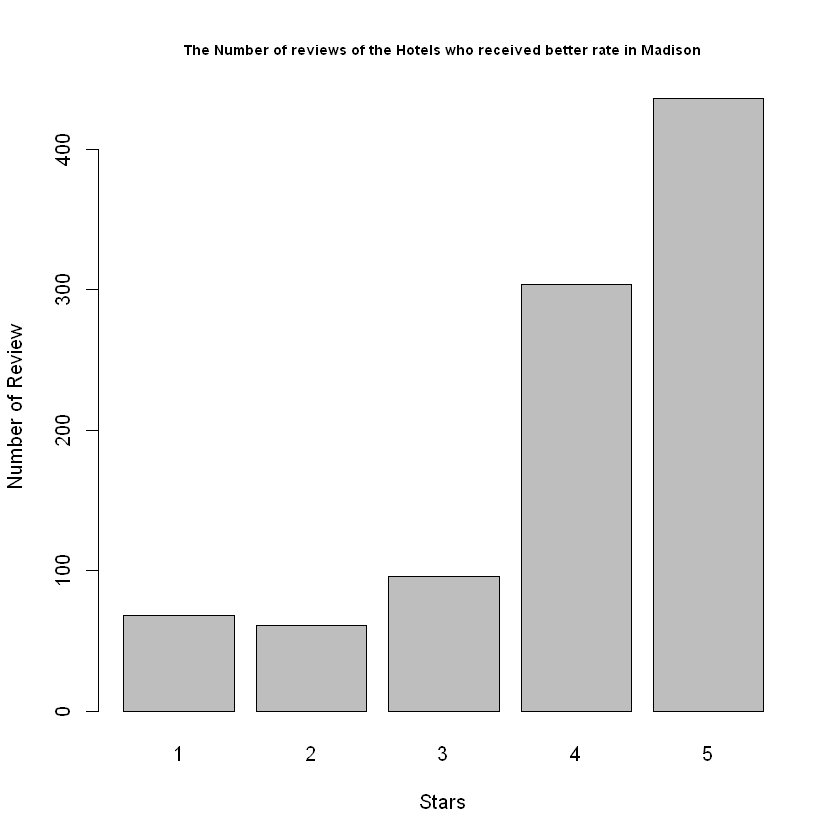

In [203]:
barplot(table(dat$stars_x[ref]),xlab="Stars",ylab="Number of Review", main="The Number of reviews of the Hotels who received better rate in Madison", cex.main = 0.7)

In [170]:
betterhotel.dat <- dat[ref,-c(1,3:10)]
stars <- betterhotel.dat[,1]
betterhotel.dat <- cbind(stars, betterhotel.dat[names(sort(words[words>summary(words)[5]]))])

In [171]:
head(betterhotel.dat)

,stars,spot,level,several,without,loved,charge,reason,employee,doesnt,...,one,place,great,clean,staff,breakfast,nice,stay,hotel,room
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,1,1,1,0,1
35,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
36,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
50,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,2
73,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,2,1
80,5,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,2


In [172]:
dim(betterhotel.dat)

[1] 965 349

In [207]:
better.words <- apply(betterhotel.dat[,2:dim(betterhotel.dat)[2]],2,sum)
sort(better.words, decreasing= TRUE)

room         hotel          stay          nice     breakfast 
         1509          1421           657           646           561 
        great         staff         clean       madison         place 
          549           516           498           418           407 
         free         night           one          good           bed 
          389           383           381           364           363 
        would      location           get        stayed          like 
          351           340           340           323           318 
         desk          time          also          area      friendly 
          313           308           302           300           298 
       really         front             u       service       parking 
          290           269           253           252           246 
        didnt   comfortable           bar          pool          well 
          223           220           219           217           214 
          day          back           lot    restaurant      bathroom 
          211           206           194           188           186 
         even       staying         floor           two            go 
          173           167           165           163           162 
        could            im         super        shower          dont 
          162           161           158           150           150 
      helpful    definitely         lobby         check       morning 
          149           148           147           143           142 
        right        little    everything          make         thing 
          141           140           137           137           137 
          got         water         small          food         first 
          137           136           135           135           133 
        price           inn           new    experience         next. 
          132           132           131           131           131 
      shuttle      downtown          much           hot          need 
          130           129           129           128           128 
         best        coffee        around        people          work 
          126           123           123           120           118 
          big           ive          hour          club         every 
          116           115           114           112           112 
        suite        pretty         guest          star         close 
          110           110           109           109           108 
        drink       hampton           way           use          went 
          107           106           106           105           105 
         made       weekend     recommend      business          many 
          104           103           103           103           103 
       street        better          door      spacious           say 
          102           101           101           100           100 
        large           bit       walking          easy            tv 
           99            99            98            98            98 
         said          year          feel            X2      governor 
           98            97            96            96            95 
        going          come         never        always          sure 
           94            94            94            93            92 
       minute          told     excellent        enough          ever 
           92            91            90            89            88 
         away       manager       capitol         quiet       overall 
           88            88            87            87            87 
     building         youre      distance          love          walk 
           86            84            83            83            83 
         find         sleep         state         noise          wifi 
           82            82            81            81            81 
      amazing          full      

In [208]:
word.better.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(betterhotel.dat$stars == 1))
total.star2 <-length(which(betterhotel.dat$stars == 2))
total.star3 <-length(which(betterhotel.dat$stars == 3))
total.star4 <-length(which(betterhotel.dat$stars == 4))
total.star5 <-length(which(betterhotel.dat$stars == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(betterhotel.dat$stars,betterhotel.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}

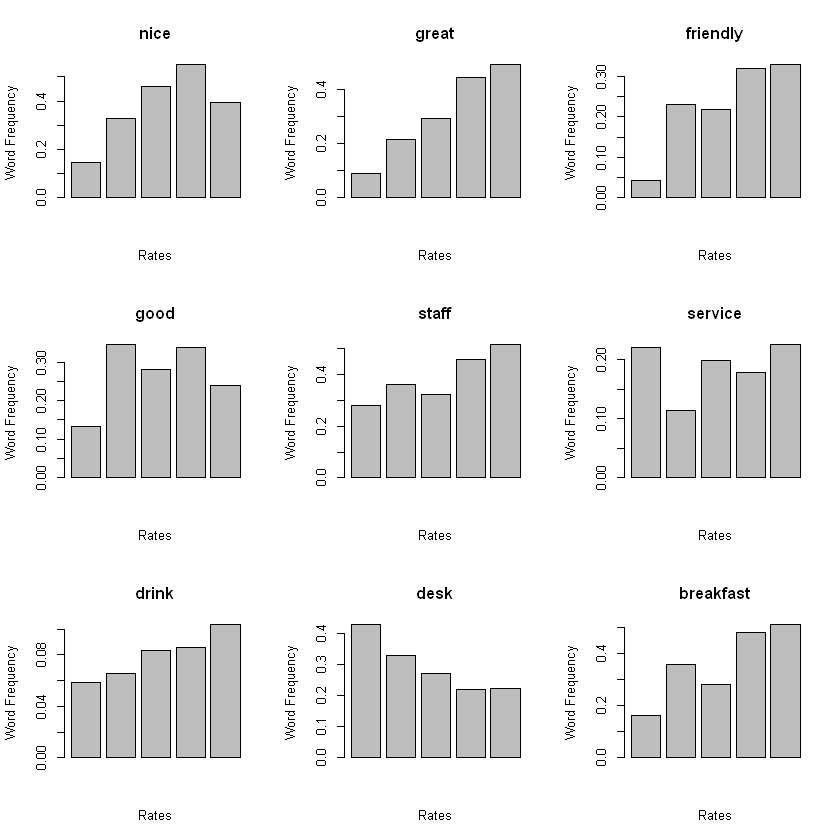

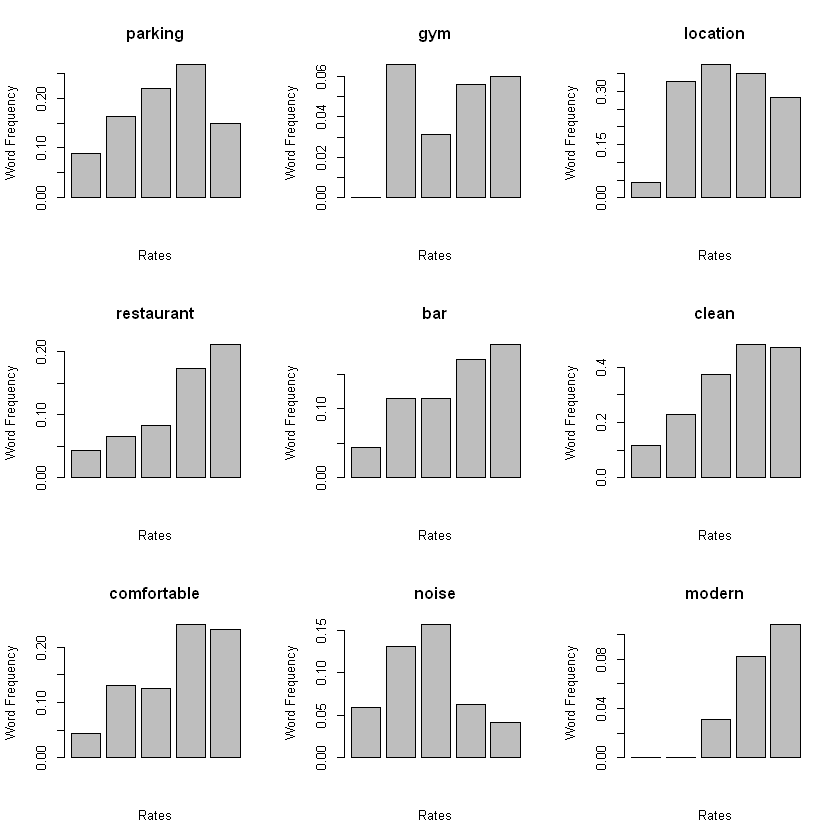

In [202]:
par(mfrow=c(3,3))
word.better.frequency("nice")
word.better.frequency("great")
word.better.frequency("friendly")
word.better.frequency("good")

word.better.frequency("staff")
word.better.frequency("service")
word.better.frequency("drink")
word.better.frequency("desk")
word.better.frequency("breakfast")

word.better.frequency("parking")
word.better.frequency("gym")

word.better.frequency("location")
word.better.frequency("restaurant")
word.better.frequency("bar")

word.better.frequency("clean")
word.better.frequency("comfortable")
word.better.frequency("noise")
word.better.frequency("modern")